# Проект. Предсказание дефолта клиента

Имеется датасет. Тебуется на его основании предсказать дефолт клиента по кредитной карте в следующем месяце.

**Информация о данных:**

Этот набор данных содержит информацию о невыплаченных платежах, демографических факторах, кредитных данных, истории платежей и выписках по счетам клиентов кредитных карт на Тайване с апреля 2005 года по сентябрь 2005 года.

**Содержим 25 признаков:**

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import model_selection 
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV

## 1. Первичная обработка данных

In [2]:
df = pd.read_csv('data/UCI_Credit_Card.csv')

In [3]:
pd.set_option('display.max_columns', None)  # Показать все столбцы
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# посмотрим на данные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
# Исследуем данные на предмет пропусков
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
# Проверим на дубликаты
df.duplicated().sum()

0

Пропусков и дубликатов нет. Все признаки числовые (категориальные уже закодированы). 

## 2. Разведывательный анализ данных (EDA)

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


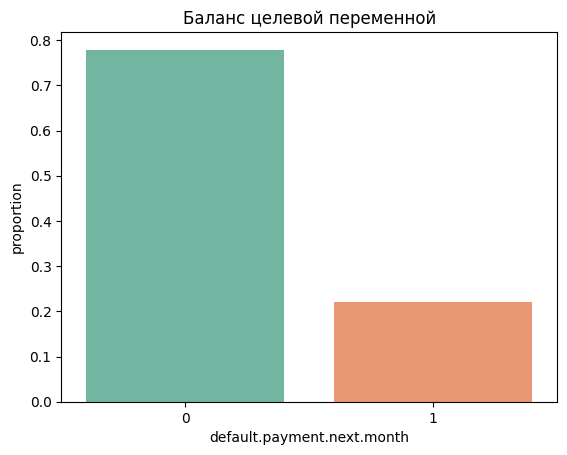

In [8]:
# Проверим соотношение классов в данных на предмет несбалансированности
barplot = sns.barplot(df['default.payment.next.month'].value_counts(True),palette='Set2');
barplot.set_title(f'Баланс целевой переменной')
plt.show()

Видим, что распределение признака просрочки по кредитной карте несбалансировано. Клиентов с дефолтом по платежам примерно 20%.

## 3. Создание новых признаков (Feature Engineering) и отбор признаков
Попробуем из существующих признаков получить новые

In [9]:
df_fe = df.copy()

### 3.1 ДИНАМИКА СТАТУСОВ ПЛАТЕЖЕЙ 

In [10]:

# Переименуем PAY_0 в PAY_1 для удобства (чтобы были последовательно 1-6)
df_fe.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

# Список статусов платежей в хронологическом порядке (от апреля к сентябрю)
pay_columns = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_1']

# Признак: ухудшается ли статус платежей со временем
# Сравниваем каждый месяц с предыдущим, считаем количество ухудшений
def calculate_deterioration(row):
    deteriorations = 0
    for i in range(1, len(pay_columns)):
        if row[pay_columns[i]] > row[pay_columns[i-1]]:
            deteriorations += 1
    return deteriorations

df_fe['PAY_DETERIORATION_COUNT'] = df_fe[pay_columns].apply(calculate_deterioration, axis=1)

# Бинарный признак: есть ли ухудшение в последних 2 месяцах
df_fe['RECENT_DETERIORATION'] = ((df_fe['PAY_1'] > df_fe['PAY_2']) | 
                                 (df_fe['PAY_2'] > df_fe['PAY_3'])).astype(int)

# Признак: максимальный статус просрочки за все периоды
df_fe['MAX_DELINQUENCY_STATUS'] = df_fe[pay_columns].max(axis=1)

# Признак: был ли клиент когда-либо в серьезной просрочке (статус >= 3)
df_fe['EVER_SERIOUS_DELINQUENT'] = (df_fe[pay_columns].max(axis=1) >= 3).astype(int)

### 3.2. ПРИЗНАКИ, СВЯЗАННЫЕ С РЕВОЛЬВЕРНЫМ КРЕДИТОМ 
(когда клиент берет кредит и гасит в следующем месяце)

In [11]:
# Количество месяцев, когда клиент использовал револьверный кредит (статус = 0)
df_fe['REVOLVING_CREDIT_MONTHS'] = (df_fe[pay_columns] == 0).sum(axis=1)

# Использует ли клиент револьверный кредит постоянно (3+ месяца подряд)
def has_revolving_streak(row):
    for i in range(len(pay_columns)-2):
        if row[pay_columns[i]] == 0 and row[pay_columns[i+1]] == 0 and row[pay_columns[i+2]] == 0:
            return 1
    return 0

df_fe['REVOLVING_CREDIT_STREAK'] = df_fe[pay_columns].apply(has_revolving_streak, axis=1)

### 3.3. СООТНОШЕНИЯ ПЛАТЕЖЕЙ И ЗАДОЛЖЕННОСТЕЙ

In [12]:
# Соотношение платежа к сумме счета для каждого месяца
# PAY_AMT1 (платеж в сентябре) относится к BILL_AMT2 (выписка за август)
df_fe['PAYMENT_RATIO_SEP'] = np.where(df_fe['BILL_AMT2'] > 0, 
                                     df_fe['PAY_AMT1'] / df_fe['BILL_AMT2'], 0)

df_fe['PAYMENT_RATIO_AUG'] = np.where(df_fe['BILL_AMT3'] > 0, 
                                     df_fe['PAY_AMT2'] / df_fe['BILL_AMT3'], 0)

df_fe['PAYMENT_RATIO_JUL'] = np.where(df_fe['BILL_AMT4'] > 0, 
                                     df_fe['PAY_AMT3'] / df_fe['BILL_AMT4'], 0)

# Среднее соотношение платежа за последние 3 месяца
payment_ratio_cols = ['PAYMENT_RATIO_SEP', 'PAYMENT_RATIO_AUG', 'PAYMENT_RATIO_JUL']
df_fe['AVG_PAYMENT_RATIO_3M'] = df_fe[payment_ratio_cols].replace([np.inf, -np.inf], 0).mean(axis=1)

# Признак: клиент обычно платит больше минимального платежа
df_fe['GOOD_PAYMENT_HABIT'] = (df_fe['AVG_PAYMENT_RATIO_3M'] > 0.1).astype(int)

### 3.4. ПРИЗНАКИ ИСПОЛЬЗОВАНИЯ КРЕДИТНОГО ЛИМИТА


In [13]:
# Текущая загрузка кредитного лимита (последняя выписка / лимит)
df_fe['CREDIT_UTILIZATION_SEP'] = df_fe['BILL_AMT1'] / df_fe['LIMIT_BAL']

# Средняя загрузка за 6 месяцев
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df_fe['AVG_CREDIT_UTILIZATION'] = df_fe[bill_columns].mean(axis=1) / df_fe['LIMIT_BAL']

# Максимальная загрузка за 6 месяцев
df_fe['MAX_CREDIT_UTILIZATION'] = df_fe[bill_columns].max(axis=1) / df_fe['LIMIT_BAL']


### 3.5. ПРИЗНАКИ ПЛАТЕЖНОЙ АКТИВНОСТИ

In [14]:
# Суммарные платежи за 6 месяцев
pay_amt_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df_fe['TOTAL_PAYMENTS_6M'] = df_fe[pay_amt_columns].sum(axis=1)

# Отношение суммарных платежей к среднему долгу
df_fe['PAYMENT_TO_DEBT_RATIO'] = np.where(df_fe[bill_columns].mean(axis=1) > 0,
                                         df_fe['TOTAL_PAYMENTS_6M'] / df_fe[bill_columns].mean(axis=1), 0)


### 3.6. ДОПОЛНИТЕЛЬНЫЕ ПРИЗНАКИ

In [15]:
# Признак: количество месяцев с просрочкой (статус >= 1)
df_fe['DELINQUENT_MONTHS_COUNT'] = (df_fe[pay_columns] >= 1).sum(axis=1)

# Признак: текущая просрочка (статус в последнем месяце >= 1)
df_fe['CURRENTLY_DELINQUENT'] = (df_fe['PAY_1'] >= 1).astype(int)



In [16]:
# Проверяем созданные признаки
print("\nСозданные признаки:")
new_features = [col for col in df_fe.columns if col not in df.columns]
print(f"Всего создано {len(new_features)} новых признаков:")
for feature in new_features:
    print(f"  - {feature}")


Созданные признаки:
Всего создано 19 новых признаков:
  - PAY_1
  - PAY_DETERIORATION_COUNT
  - RECENT_DETERIORATION
  - MAX_DELINQUENCY_STATUS
  - EVER_SERIOUS_DELINQUENT
  - REVOLVING_CREDIT_MONTHS
  - REVOLVING_CREDIT_STREAK
  - PAYMENT_RATIO_SEP
  - PAYMENT_RATIO_AUG
  - PAYMENT_RATIO_JUL
  - AVG_PAYMENT_RATIO_3M
  - GOOD_PAYMENT_HABIT
  - CREDIT_UTILIZATION_SEP
  - AVG_CREDIT_UTILIZATION
  - MAX_CREDIT_UTILIZATION
  - TOTAL_PAYMENTS_6M
  - PAYMENT_TO_DEBT_RATIO
  - DELINQUENT_MONTHS_COUNT
  - CURRENTLY_DELINQUENT


In [17]:
# Посмотрим основнную статистику по новым признакам
display(df_fe[new_features].describe())

,PAY_1,PAY_DETERIORATION_COUNT,RECENT_DETERIORATION,MAX_DELINQUENCY_STATUS,EVER_SERIOUS_DELINQUENT,REVOLVING_CREDIT_MONTHS,REVOLVING_CREDIT_STREAK,PAYMENT_RATIO_SEP,PAYMENT_RATIO_AUG,PAYMENT_RATIO_JUL,AVG_PAYMENT_RATIO_3M,GOOD_PAYMENT_HABIT,CREDIT_UTILIZATION_SEP,AVG_CREDIT_UTILIZATION,MAX_CREDIT_UTILIZATION,TOTAL_PAYMENTS_6M,PAYMENT_TO_DEBT_RATIO,DELINQUENT_MONTHS_COUNT,CURRENTLY_DELINQUENT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,-0.016700,0.521867,0.220967,0.438733,0.039767,3.197300,0.546800,0.473826,0.649999,0.454088,0.525971,0.459733,0.423771,0.373048,0.494965,3.165139e+04,2.814947,0.834200,0.227267
std,1.123802,0.688770,0.414905,1.345154,0.195414,2.514554,0.497813,25.679888,38.681726,25.683678,27.435519,0.498384,0.411462,0.351890,0.433046,6.082768e+04,33.040233,1.554303,0.419073
min,-2.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.619892,-0.232590,-0.100000,0.000000e+00,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036905,0.036227,0.029751,0.042081,0.000000,0.022032,0.029997,0.070636,6.679750e+03,0.245711,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.062194,0.060667,0.048410,0.080773,0.000000,0.313994,0.284834,0.430702,1.438300e+04,0.509594,0.000000,0.000000
75%,0.000000,1.000000,0.000000,2.000000,0.000000,6.000000,1.000000,0.520365,0.510595,0.353156,0.508307,1.000000,0.829843,0.687929,0.923246,3.350350e+04,3.521532,1.000000,0.000000
max,8.000000,5.000000,1.000000,8.000000,1.000000,6.000000,1.000000,4444.333333,5001.000000,4444.333333,4444.333333,1.000000,6.455300,5.364308,10.688575,3.764066e+06,4782.000000,6.000000,1.000000


### 3.7. Оценим мультиколлинеарность и взаимосвязь признаков с целевой переменной.

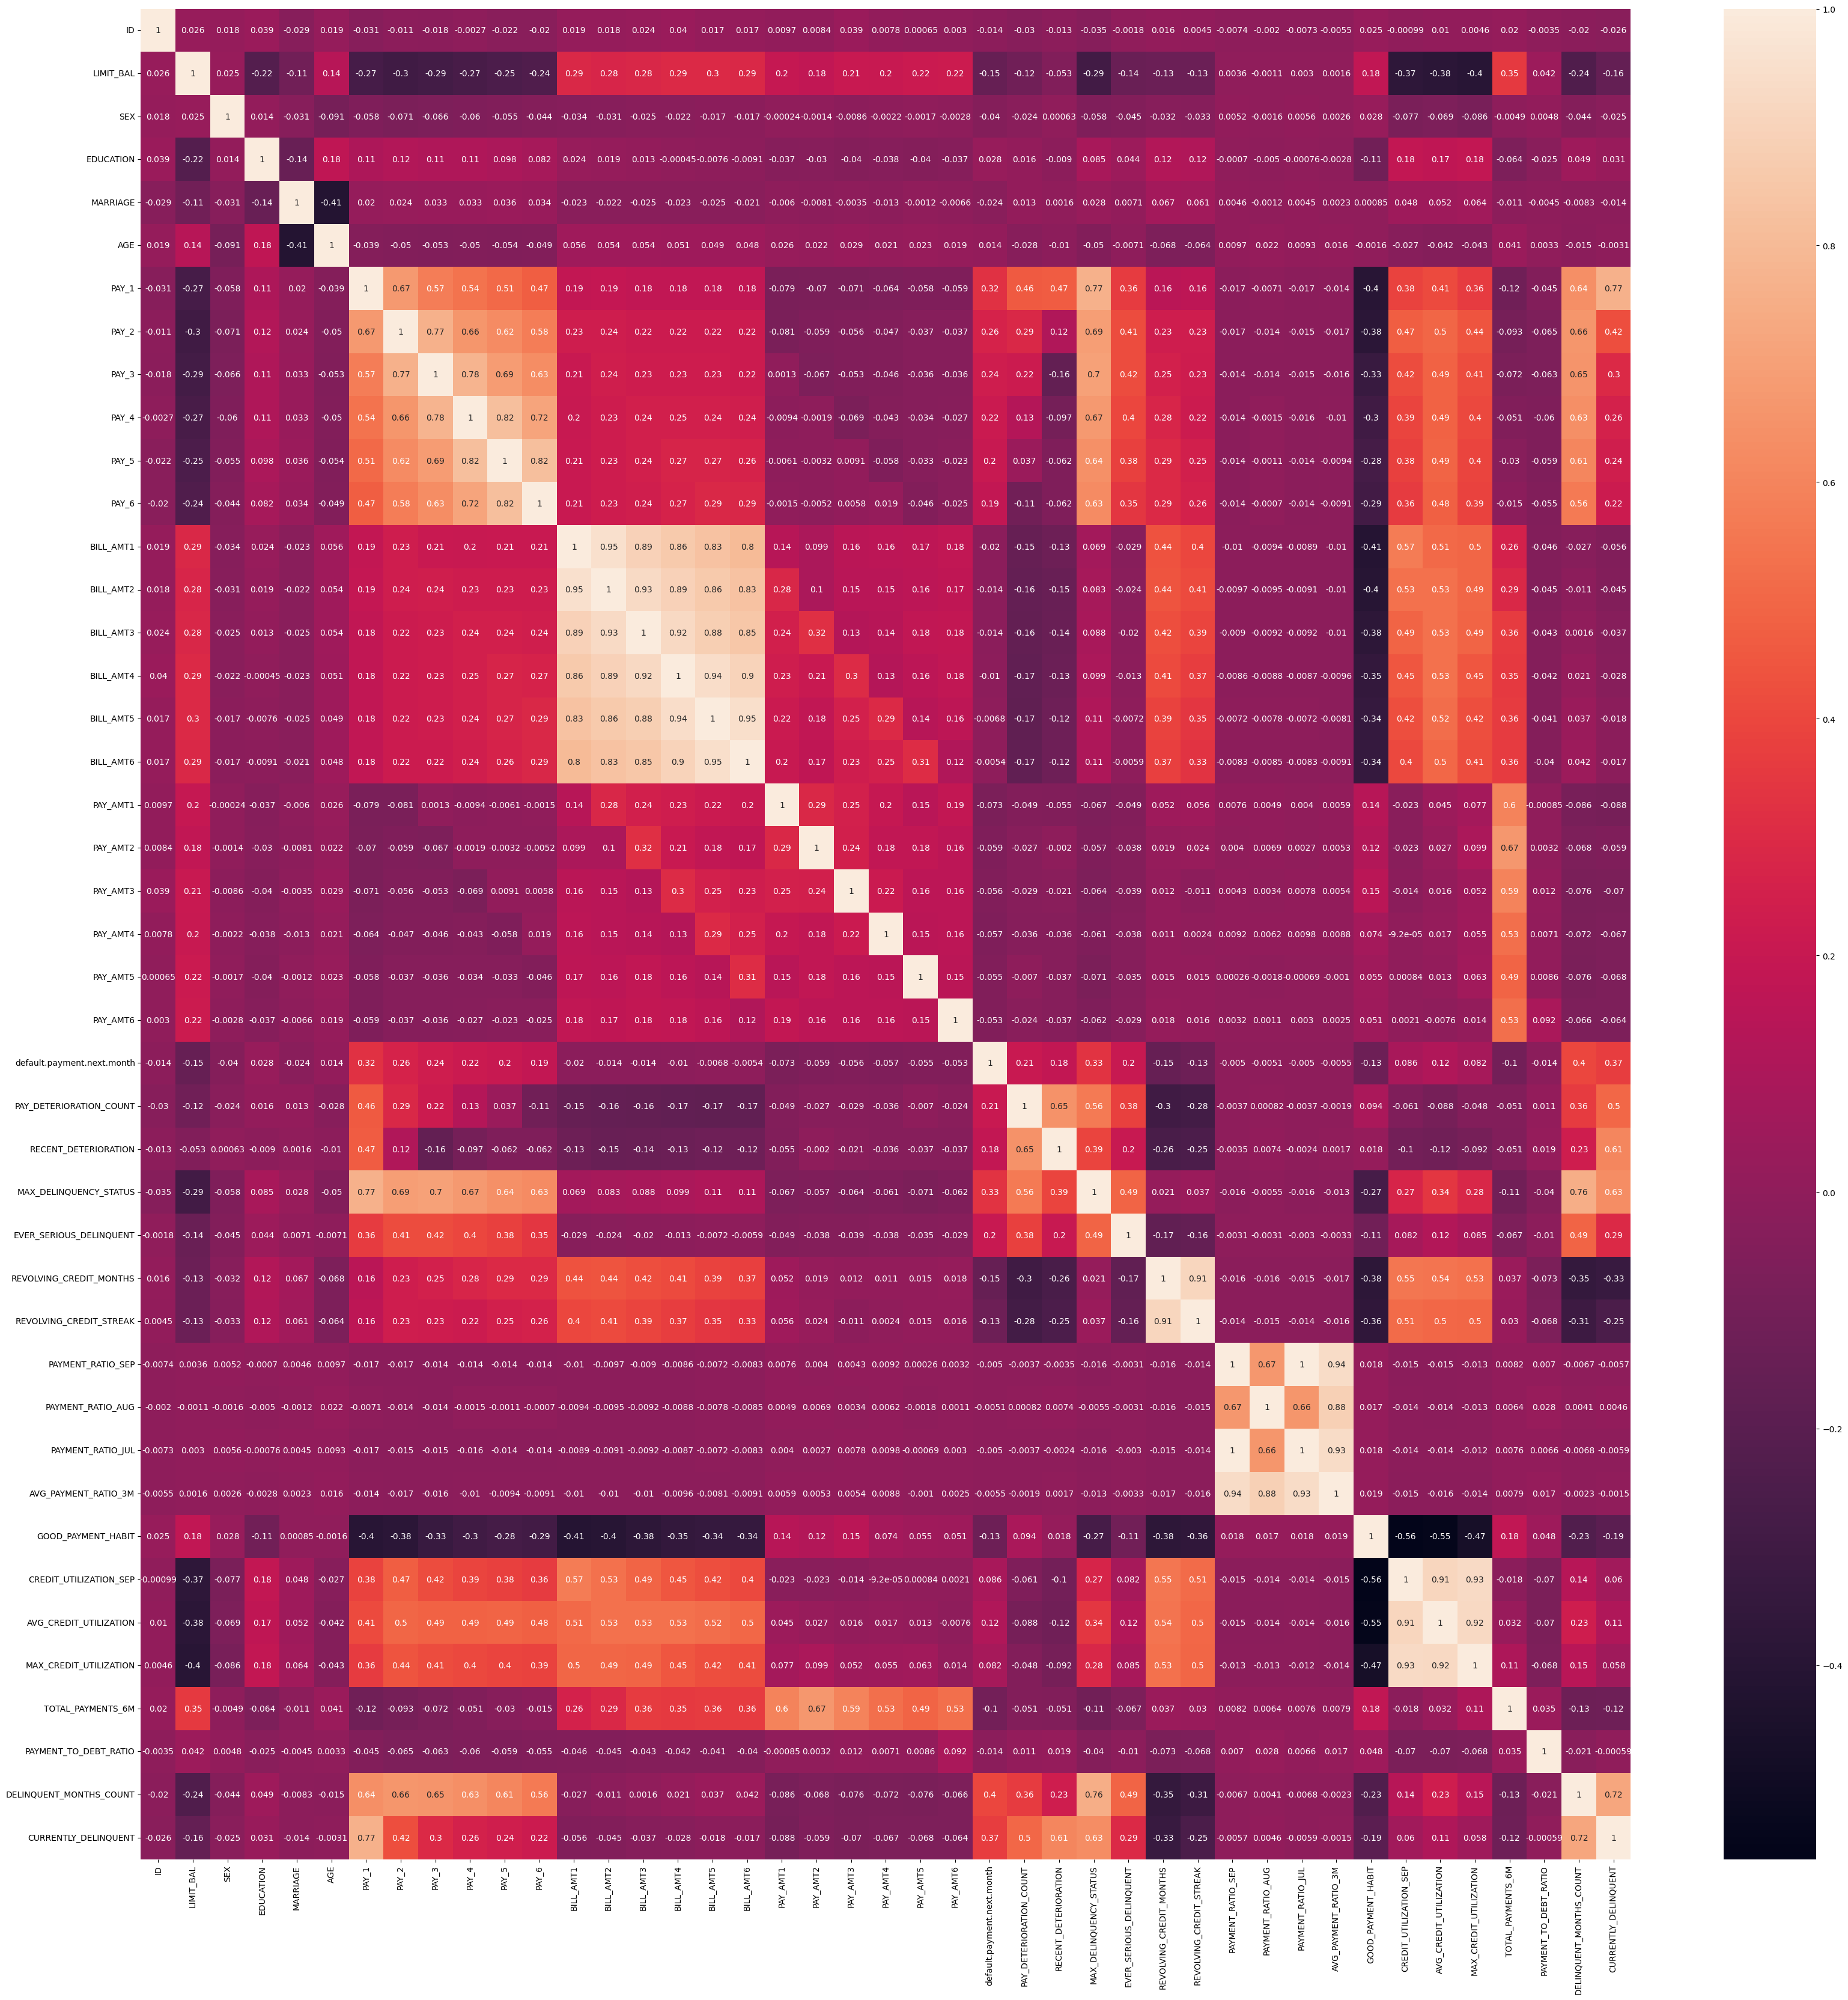

In [18]:
plt.figure(figsize = (40, 40))
sns.heatmap(df_fe.corr(numeric_only=True), annot = True);

С целевой переменной мультиколлинеарность не наблюдается. Есть корреляция признаков между собой, но пока в первом приближении оставим их.

### Разделим данные на обучающую и тестовую выборки принимая во внимание неравномерность распределения целевой переменной. (применим стратификацию при разбиении)

In [19]:
X = df_fe.drop(['default.payment.next.month'], axis=1)
y = df_fe['default.payment.next.month']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.25)

In [20]:
print('Train:\n', y_train.value_counts(normalize=True), sep='')
print('Test:\n', y_test.value_counts(normalize=True), sep='')

Train:
default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64
Test:
default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.

С помощью SelectKBest отберем 30 признаков, наилучшим образом подходящих для использования в задаче. 

In [21]:
X.shape

(30000, 42)

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_classif, k=30)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'PAY_DETERIORATION_COUNT', 'RECENT_DETERIORATION',
       'MAX_DELINQUENCY_STATUS', 'EVER_SERIOUS_DELINQUENT',
       'REVOLVING_CREDIT_MONTHS', 'REVOLVING_CREDIT_STREAK',
       'GOOD_PAYMENT_HABIT', 'CREDIT_UTILIZATION_SEP',
       'AVG_CREDIT_UTILIZATION', 'MAX_CREDIT_UTILIZATION',
       'TOTAL_PAYMENTS_6M', 'DELINQUENT_MONTHS_COUNT',
       'CURRENTLY_DELINQUENT'], dtype=object)

### Удалим признаки с высокой мультиколлинеарностью

In [23]:
cols_for_study = selector.get_feature_names_out()
to_remove = ['CREDIT_UTILIZATION_SEP','REVOLVING_CREDIT_STREAK']
mask = ~np.isin(cols_for_study, to_remove)
cols_for_study_filtred = cols_for_study[mask]
X_train = X_train[cols_for_study_filtred]
X_test = X_test[cols_for_study_filtred]

### Нормализация данных

In [24]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=cols_for_study_filtred)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=cols_for_study_filtred)


In [25]:
X_train_scaled

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_DETERIORATION_COUNT,RECENT_DETERIORATION,MAX_DELINQUENCY_STATUS,EVER_SERIOUS_DELINQUENT,REVOLVING_CREDIT_MONTHS,GOOD_PAYMENT_HABIT,AVG_CREDIT_UTILIZATION,MAX_CREDIT_UTILIZATION,TOTAL_PAYMENTS_6M,DELINQUENT_MONTHS_COUNT,CURRENTLY_DELINQUENT
0,0.191919,0.0,0.166667,0.666667,0.1,0.1,0.1,0.0,0.0,0.0,0.147515,0.002498,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.0,0.1,0.0,0.000000,1.0,0.042049,0.010280,0.000580,0.000000,0.0
1,0.313131,1.0,0.166667,0.666667,0.2,0.2,0.2,0.2,0.2,0.2,0.405855,0.015225,0.010495,0.001445,0.016605,0.019680,0.015635,0.0,0.0,0.2,0.0,1.000000,0.0,0.129570,0.094200,0.014426,0.000000,0.0
2,0.161616,1.0,0.166667,0.666667,0.1,0.1,0.4,0.1,0.1,0.1,0.146834,0.001758,0.000000,0.000821,0.001185,0.001726,0.001396,0.2,0.0,0.4,0.0,0.000000,1.0,0.042393,0.010072,0.001190,0.166667,0.0
3,0.080808,1.0,0.500000,0.333333,0.2,0.2,0.2,0.2,0.2,0.2,0.226095,0.003910,0.003408,0.001897,0.003040,0.006354,0.002846,0.0,0.0,0.2,0.0,1.000000,0.0,0.171392,0.101886,0.004080,0.000000,0.0
4,0.242424,1.0,0.166667,0.333333,0.1,0.1,0.1,0.2,0.2,0.1,0.161964,0.028493,0.039815,0.000000,0.008794,0.035168,0.011382,0.2,0.0,0.2,0.0,0.333333,1.0,0.053168,0.026063,0.026499,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,0.191919,1.0,0.333333,0.333333,0.2,0.2,0.0,0.0,0.0,0.0,0.155988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,1.0,0.2,0.0,0.333333,0.0,0.043150,0.014228,0.000000,0.000000,0.0
22496,0.111111,1.0,0.333333,0.666667,0.2,0.2,0.2,0.2,0.2,0.4,0.245924,0.004808,0.003373,0.004576,0.016103,0.010691,0.000000,0.0,0.0,0.4,0.0,0.833333,0.0,0.215075,0.103603,0.007162,0.166667,0.0
22497,0.111111,1.0,0.166667,0.666667,0.2,0.2,0.2,0.2,0.2,0.2,0.213590,0.004236,0.001664,0.002250,0.003221,0.002813,0.001897,0.0,0.0,0.2,0.0,1.000000,0.0,0.121444,0.067976,0.003172,0.000000,0.0
22498,0.353535,0.0,0.166667,0.333333,0.3,0.0,0.1,0.1,0.1,0.0,0.146519,0.000000,0.000708,0.000275,0.000000,0.000000,0.000000,0.4,1.0,0.3,0.0,0.000000,1.0,0.041641,0.009490,0.000294,0.166667,1.0


## 4. Решение задачи классификации: логистическая регрессия и решающие деревья

### 4.1 Обучим модель логистической регрессии и рассчитаем метрики качества

In [26]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(solver='sag',max_iter = 1000, random_state=42)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)
#Предсказываем результаты
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

print('метрики на тренировочном наборе')
print(metrics.classification_report(y_train, y_train_pred))
print('метрики на тестовом наборе')
print(metrics.classification_report(y_test, y_test_pred))

y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Вероятности класса 1
# Вычисление метрик
auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * auc - 1
print(f"Logistic Regression - AUC: {auc:.4f}, GINI: {gini:.4f}")

from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc:.4f}")

метрики на тренировочном наборе
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     17523
           1       0.64      0.30      0.41      4977

    accuracy                           0.81     22500
   macro avg       0.74      0.63      0.65     22500
weighted avg       0.79      0.81      0.78     22500

метрики на тестовом наборе
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5841
           1       0.64      0.29      0.40      1659

    accuracy                           0.81      7500
   macro avg       0.73      0.62      0.64      7500
weighted avg       0.78      0.81      0.78      7500

Logistic Regression - AUC: 0.7486, GINI: 0.4972
PR-AUC: 0.5061


Проверим метрики с помощью кросс-валидации на 5 фолдах

In [27]:
#scaler = preprocessing.MinMaxScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X[cols_for_study_filtred]), columns=cols_for_study_filtred)

#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=log_reg, #модель
    X=X_train_scaled, #матрица наблюдений X
    y=y_train, #вектор ответов y
    cv=skf, #кросс-валидатор
    scoring='roc_auc', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)

# Подсчитаем среднее значение F-score на выборках:
print('Train k-fold mean AUC: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean AUC: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

{'fit_time': array([0.13608479, 0.15130877, 0.18089461, 0.16727543, 0.1576755 ]),
 'score_time': array([0.01537752, 0.01562619, 0.00518084, 0.00922513, 0.01564217]),
 'test_score': array([0.76497844, 0.75277494, 0.76331859, 0.75389157, 0.76668965]),
 'train_score': array([0.76150711, 0.76463447, 0.76117089, 0.76245939, 0.75996189])}

Train k-fold mean AUC: 0.76
Valid k-fold mean AUC: 0.76


Видим стандартную проблему для несбалансированной выборки. Стандартные методы ML, такие как дерево решений и логистическая
регрессия, имеют тенденцию игнорировать класс меньшинства. Модель хорошо определяет клиентов без дефолта, но с дефолтом гораздо хуже. попробуем добавить веса классов.

In [28]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(solver='sag',max_iter = 1000, random_state=42, class_weight='balanced')
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)
#Предсказываем результаты
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

print('метрики на тренировочном наборе')
print(metrics.classification_report(y_train, y_train_pred))
print('метрики на тестовом наборе')
print(metrics.classification_report(y_test, y_test_pred))

y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Вероятности класса 1
# Вычисление метрик
auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * auc - 1
print(f"Logistic Regression - AUC: {auc:.4f}, GINI: {gini:.4f}")
from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc:.4f}")

метрики на тренировочном наборе
              precision    recall  f1-score   support

           0       0.88      0.79      0.84     17523
           1       0.46      0.62      0.53      4977

    accuracy                           0.76     22500
   macro avg       0.67      0.71      0.68     22500
weighted avg       0.79      0.76      0.77     22500

метрики на тестовом наборе
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      5841
           1       0.45      0.60      0.51      1659

    accuracy                           0.75      7500
   macro avg       0.66      0.69      0.67      7500
weighted avg       0.78      0.75      0.76      7500

Logistic Regression - AUC: 0.7510, GINI: 0.5019
PR-AUC: 0.5016


### 4.2 Обучим дерево решений

In [29]:
#Создаем объект класса дерево решений
dt = tree.DecisionTreeClassifier(criterion='entropy',
                                 random_state=42,  
                                 max_depth=5,
                                 min_samples_split=2,
                                 class_weight='balanced')
#Обучаем дерево по алгоритму CART
dt.fit(X_train_scaled, y_train)
#Выводим значения метрики 
y_train_pred = dt.predict(X_train_scaled)
y_test_pred = dt.predict(X_test_scaled)

print('метрики на тренировочном наборе')
print(metrics.classification_report(y_train, y_train_pred))
print('метрики на тестовом наборе')
print(metrics.classification_report(y_test, y_test_pred))

y_pred_proba = dt.predict_proba(X_test_scaled)[:, 1]  # Вероятности класса 1
# Вычисление метрик
auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * auc - 1
print(f"DecisionTree - AUC: {auc:.4f}, GINI: {gini:.4f}")
from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc:.4f}")

метрики на тренировочном наборе
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     17523
           1       0.46      0.67      0.54      4977

    accuracy                           0.75     22500
   macro avg       0.67      0.72      0.69     22500
weighted avg       0.79      0.75      0.77     22500

метрики на тестовом наборе
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      5841
           1       0.44      0.65      0.53      1659

    accuracy                           0.74      7500
   macro avg       0.66      0.71      0.67      7500
weighted avg       0.79      0.74      0.76      7500

DecisionTree - AUC: 0.7701, GINI: 0.5401
PR-AUC: 0.5221


Попробуем подобрать оптимальные гиперпараметры

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split': [2, 3, 4, 5, 6 ,8, 10, 12] ,#мин кол-во объектов в листе
              'max_depth':[3,5,7,9,11,13], #глубина дерева
              }
grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(
        criterion='entropy',
        random_state=42
    ), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1,
    scoring='roc_auc'
)  
%time grid_search.fit(X_train_scaled, y_train) 

print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: total: 734 ms
Wall time: 12.9 s
Наилучшие значения гиперпараметров: {'max_depth': 5, 'min_samples_split': 2}


## 5. Ансамбли моделей

### 5.1 Обучим модель случайного леса

In [31]:
from sklearn.metrics import classification_report
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(n_estimators=100,
                                     criterion='gini',
                                     min_samples_leaf=5,
                                     max_depth=10,
                                     random_state=42,
                                     class_weight='balanced')
#Обучаем модель
rf.fit(X_train_scaled, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

print('метрики на тренировочном наборе')
print(metrics.classification_report(y_train, y_train_pred))
print('метрики на тестовом наборе')
print(metrics.classification_report(y_test, y_test_pred))
print(metrics.f1_score(y_test, y_test_pred))

y_pred_proba =rf.predict_proba(X_test_scaled)[:, 1]  # Вероятности класса 1
auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * auc - 1
print(f"RandomForest - AUC: {auc:.4f}, GINI: {gini:.4f}")

from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc:.4f}")

метрики на тренировочном наборе
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     17523
           1       0.58      0.68      0.63      4977

    accuracy                           0.82     22500
   macro avg       0.74      0.77      0.76     22500
weighted avg       0.83      0.82      0.83     22500

метрики на тестовом наборе
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      5841
           1       0.50      0.59      0.54      1659

    accuracy                           0.78      7500
   macro avg       0.69      0.71      0.70      7500
weighted avg       0.79      0.78      0.79      7500

0.5426442174993099
RandomForest - AUC: 0.7799, GINI: 0.5598
PR-AUC: 0.5580


Проверим метрики на кросс-валидации.

In [32]:
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=rf, #модель
    X=X_train_scaled, #матрица наблюдений X
    y=y_train, #вектор ответов y
    cv=skf, #кросс-валидатор
    scoring='roc_auc', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)


# Подсчитаем среднее значение F-score на выборках:
print('Train k-fold mean AUC: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean AUC: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

{'fit_time': array([6.7830286 , 6.87760377, 6.56662178, 6.79463863, 6.82366014]),
 'score_time': array([0.09783983, 0.11673117, 0.10938239, 0.11467695, 0.0937376 ]),
 'test_score': array([0.7879208 , 0.78347465, 0.78421265, 0.78482125, 0.78386168]),
 'train_score': array([0.87862468, 0.87947941, 0.87743996, 0.87969744, 0.87849402])}

Train k-fold mean AUC: 0.88
Valid k-fold mean AUC: 0.78


Подберем оптимальные гиперпараметры модели.

In [33]:
param_distributions = {'n_estimators': list(range(80, 200, 30)),
              'min_samples_leaf': [5,7,9,11,13],
              'max_depth': list(np.linspace(5, 40, 5, dtype=int))
              }
            
random_search_forest = RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42,                  criterion='gini'), 
    param_distributions=param_distributions, 
    cv=5,
    n_iter = 10, 
    n_jobs = -1,
    scoring='roc_auc'
)  
%time random_search_forest.fit(X_train_scaled, y_train) 
y_train_pred = random_search_forest.predict(X_train_scaled)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print("accuracy на тестовом наборе: {:.2f}".format(random_search_forest.score(X_test_scaled, y_test)))
y_test_pred = random_search_forest.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search_forest.best_params_))

CPU times: total: 6.83 s
Wall time: 4min 23s
f1_score на обучающем наборе: 0.53
accuracy на тестовом наборе: 0.78
f1_score на тестовом наборе: 0.47
Наилучшие значения гиперпараметров: {'n_estimators': 170, 'min_samples_leaf': 11, 'max_depth': 13}


In [34]:
#Обучим на подобраных параметрах
rf = ensemble.RandomForestClassifier(n_estimators=140,
                                     criterion='gini',
                                     min_samples_leaf=13,
                                     max_depth=31,
                                     random_state=42,
                                     class_weight='balanced')
#Обучаем модель
rf.fit(X_train_scaled, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

print('метрики на тренировочном наборе')
print(metrics.classification_report(y_train, y_train_pred))
print('метрики на тестовом наборе')
print(metrics.classification_report(y_test, y_test_pred))
print(metrics.f1_score(y_test, y_test_pred))

y_pred_proba =rf.predict_proba(X_test_scaled)[:, 1]  # Вероятности класса 1
auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * auc - 1
print(f"RandomForest - AUC: {auc:.4f}, GINI: {gini:.4f}")

from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc:.4f}")

метрики на тренировочном наборе
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     17523
           1       0.60      0.73      0.66      4977

    accuracy                           0.83     22500
   macro avg       0.76      0.80      0.77     22500
weighted avg       0.85      0.83      0.84     22500

метрики на тестовом наборе
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      5841
           1       0.50      0.58      0.54      1659

    accuracy                           0.78      7500
   macro avg       0.69      0.71      0.70      7500
weighted avg       0.79      0.78      0.78      7500

0.5371142618849041
RandomForest - AUC: 0.7773, GINI: 0.5546
PR-AUC: 0.5587


Первоначальные параметры были лучше, будем ориентироваться на первую модель.

### 5.2 Теперь попробуем модель градиентного бустинга

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# Создаем объект класса градиентный бустинг
gb = GradientBoostingClassifier(
                    learning_rate = 0.05, # темп обучения   
                    n_estimators = 300, #количество деревьев в ансамбле
                    min_samples_leaf = 5, # мин количество объектов в листе
                    max_depth = 5, #максимальная глубина дерева
                    random_state = 42,
                    )

# Обучаем модель
gb.fit(X_train_scaled, y_train)

# Формируем предсказание для тестовой выборки
y_train_pred = gb.predict(X_train_scaled)
y_test_pred = gb.predict(X_test_scaled)

# Посмотрим на основные метрики классификации
print(classification_report(y_test, y_test_pred))


y_pred_proba = gb.predict_proba(X_test_scaled)[:, 1]  # Вероятности класса 1
auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * auc - 1
print(f"GradientBoosting - AUC: {auc:.4f}, GINI: {gini:.4f}")

from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc:.4f}")

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5841
           1       0.66      0.36      0.47      1659

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500

GradientBoosting - AUC: 0.7804, GINI: 0.5609
PR-AUC: 0.5580


А теперь для этой же модели зададим веса классов чтоб сбалансировать данные

In [36]:
from sklearn.utils import class_weight
# Больший вес для дефолтов
sample_weights = np.array([1 if label == 0 else 2 for label in y_train])

# Создаем объект класса градиентный бустинг
gb = GradientBoostingClassifier(
                    learning_rate = 0.05, # темп обучения   
                    n_estimators = 300, #количество деревьев в ансамбле
                    min_samples_leaf = 5, # мин количество объектов в листе
                    max_depth = 5, #максимальная глубина дерева
                    random_state = 42,
                    )

# Обучаем модель
gb.fit(X_train_scaled, y_train, sample_weight=sample_weights)

# Формируем предсказание для тестовой выборки
y_train_pred = gb.predict(X_train_scaled)
y_test_pred = gb.predict(X_test_scaled)

# Посмотрим на основные метрики классификации
print(classification_report(y_test, y_test_pred))


y_pred_proba = gb.predict_proba(X_test_scaled)[:, 1]  # Вероятности класса 1
auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * auc - 1
print(f"GradientBoosting - AUC: {auc:.4f}, GINI: {gini:.4f}")

from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc:.4f}")

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5841
           1       0.55      0.51      0.53      1659

    accuracy                           0.80      7500
   macro avg       0.71      0.70      0.70      7500
weighted avg       0.79      0.80      0.80      7500

GradientBoosting - AUC: 0.7765, GINI: 0.5530
PR-AUC: 0.5548


In [37]:
def optuna_gb(trial):
  # задаем пространства поиска гиперпараметров
  learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
  n_estimators = trial.suggest_int('n_estimators', 100, 500, 50)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 12, 1)
  max_depth = trial.suggest_int('max_depth', 2, 12, 1)

  # создаем модель
  model = GradientBoostingClassifier(learning_rate=learning_rate,
                                    n_estimators=n_estimators,
                                    max_depth=max_depth,
                                    min_samples_leaf=min_samples_leaf,
                                    random_state=42)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

In [38]:
#import optuna

# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
#study = optuna.create_study(study_name="GradientBoostingClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
#study.optimize(optuna_gb, n_trials=20)

In [39]:
# Обучим на параметрах, подобранных Optuna

# Создаем объект класса градиентный бустинг
gb = GradientBoostingClassifier(
                    learning_rate = 0.38, # темп обучения   
                    n_estimators = 400, #количество деревьев в ансамбле
                    min_samples_leaf = 12, # мин количество объектов в листе
                    max_depth = 11, #максимальная глубина дерева
                    random_state = 42,
                    )

# Обучаем модель
gb.fit(X_train_scaled, y_train, sample_weight=sample_weights)

# Формируем предсказание для тестовой выборки
y_train_pred = gb.predict(X_train_scaled)
y_test_pred = gb.predict(X_test_scaled)

# Посмотрим на основные метрики классификации
print(classification_report(y_test, y_test_pred))
print(metrics.f1_score(y_test, y_test_pred))

y_pred_proba = gb.predict_proba(X_test_scaled)[:, 1]  # Вероятности класса 1
auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * auc - 1
print(f"Logistic Regression - AUC: {auc:.4f}, GINI: {gini:.4f}")

from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc:.4f}")

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      5841
           1       0.55      0.40      0.46      1659

    accuracy                           0.79      7500
   macro avg       0.69      0.65      0.67      7500
weighted avg       0.78      0.79      0.78      7500

0.4608391608391608
Logistic Regression - AUC: 0.7351, GINI: 0.4703
PR-AUC: 0.5060


## 6. ВЫБОР ПОРОГА ВЕРОЯТНОСТИ. PR-КРИВАЯ

PR-кривая (precision-recall curve) — это график зависимости precision от recall при различных значениях порога вероятности.
Для предсказания вероятностей используем функцию cross_val_predict(). Данная функция выполняет кросс-валидацию и возвращает предсказания для валидационных фолдов. Если ей передать параметр method='predict_proba', она вернёт предсказанные вероятности для каждого из классов на всех фолдах. Остальные параметры аналогичны параметрам функции cross_validate().

In [40]:
#Создаём модель
model = ensemble.RandomForestClassifier(n_estimators=140,
                                     criterion='gini',
                                     min_samples_leaf=13,
                                     max_depth=31,
                                     random_state=42,
                                     class_weight='balanced')

#Обучаем модель
model.fit(X_train, y_train)
#Создаём кросс-валидатор k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Делаем предсказание вероятностей на кросс-валидации
y_cv_proba_pred = model_selection.cross_val_predict(model, X_train, y_train, cv=skf, method='predict_proba')

y_cv_proba_pred

array([[0.75965935, 0.24034065],
       [0.78193041, 0.21806959],
       [0.58480239, 0.41519761],
       ...,
       [0.86524729, 0.13475271],
       [0.51057817, 0.48942183],
       [0.70957285, 0.29042715]])

Это массив из вероятностей для каждого клиента. Первое число в строке — вероятность того, что клиент вернет займ, а второе — вероятность того, что не вернет займ.

Нас интересует класс 1 (не вернет займ). Это второй столбец в матрице вероятностей (индекс 1). Выделим этот столбец из матрицы с вероятностями:

In [41]:
#Выделяем столбец с вероятностями для класса 1 
y_cv_proba_pred = y_cv_proba_pred[:, 1]

Теперь мы можем построить PR-кривую. Для этого воспользуемся функций precision_recall_curve() из модуля metrics библиотеки sklearn. В данную функцию нужно передать истинные метки классов и предсказанные вероятности. Взамен она вернёт три массива: значения метрик precision и recall, вычисленных на различных порогах вероятности, и сами пороги вероятности:

In [42]:
#Вычисляем координаты PR-кривой
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)

print('Thresholds:', thresholds[:5])
print('Precision scores:', precision[:5])
print('Recall scores:',recall[:5])

Thresholds: [0.00606642 0.00889946 0.01033794 0.01128862 0.01207822]
Precision scores: [0.2212     0.22120983 0.22121966 0.22118505 0.22119488]
Recall scores: [1.         1.         1.         0.99979908 0.99979908]


Вычислим значение F-score при различных порогах вероятности и найдём такой порог вероятности, при котором она максимальна. Сделать это можно с помощью функции argmax() из модуля numpy — она возвращает индекс максимального элемента массива.

Далее построим PR-кривую и отметим на ней точку максимума F-score.

Best threshold = 0.51, F1-Score = 0.55


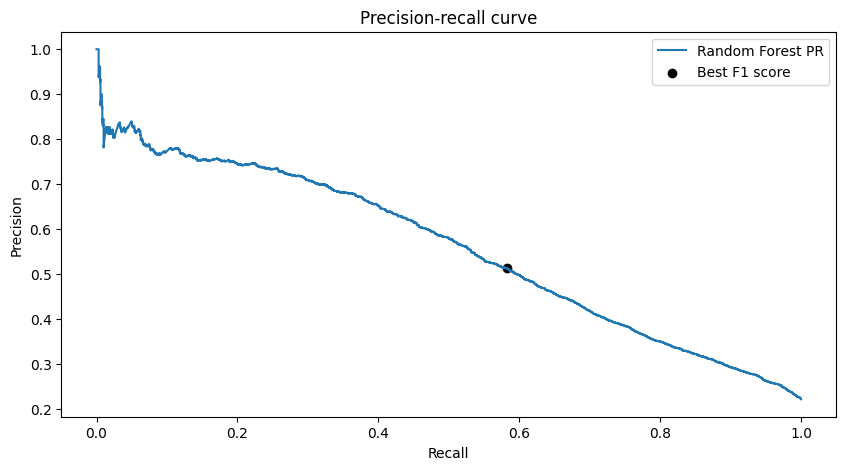

In [43]:
#Вычисляем F1-меру при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(recall, precision, label='Random Forest PR')
#Отмечаем точку максимума F1
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
#Даем графику название и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

In [44]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.4
#люди, вероятность которых не вернуть кредит > threshold_opt, относим к классу 1
#В противном случае — к классу 0
y_valid_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_valid_pred = (y_valid_pred_proba > threshold_opt).astype('int')
#Считаем метрики
print(metrics.classification_report(y_test, y_valid_pred))
auc = roc_auc_score(y_test, y_valid_pred_proba)
gini = 2 * auc - 1
print(f"RandomForest - AUC: {auc:.4f}, GINI: {gini:.4f}")

from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc:.4f}")


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5841
           1       0.22      1.00      0.36      1659

    accuracy                           0.22      7500
   macro avg       0.11      0.50      0.18      7500
weighted avg       0.05      0.22      0.08      7500

RandomForest - AUC: 0.6451, GINI: 0.2902
PR-AUC: 0.5060


## 7. Сэмплирование

у нас мало наблюдений миноритарного класса, следует искусственно увеличить их количество.

Простейшая стратегия пересэмплирования — продублировать объекты малого класса. Но это неинтересно и работает довольно плохо. Поэтому были созданы специальные алгоритмы генерации искусственных данных. Самый популярный из таких алгоритмов — алгоритм SMOTE (Synthetic Minority Oversampling Techniques).

В основе алгоритма лежит идея генерации некоторого количества искусственных наблюдений, которые были бы «похожи» на наблюдения, имеющиеся в миноритарном классе, но при этом не дублировали их.

In [45]:
from imblearn.over_sampling import SMOTE

Создадим объект класса SMOTE и вызовем у него метод fit_resample(), передав в него обучающую выборку (X_train, y_train). Затем выведем количество наблюдений каждого из классов до и после сэмплирования:

In [46]:
sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train_scaled, y_train)

print('Train shape before oversampling:', X_train.shape) 
print('Class balance before oversampling: \n', y_train.value_counts(), sep='')
print('-'*40)
print('Train shape after oversampling:', X_train_s.shape)
print('Class balance after oversampling: \n', y_train_s.value_counts(), sep='')

Train shape before oversampling: (22500, 28)
Class balance before oversampling: 
default.payment.next.month
0    17523
1     4977
Name: count, dtype: int64
----------------------------------------
Train shape after oversampling: (35046, 28)
Class balance after oversampling: 
default.payment.next.month
1    17523
0    17523
Name: count, dtype: int64


Итак, размер выборки увеличился и теперь количество наблюдений каждого из классов одинаково.

Попробуем обучить нашу модель на сгенерированных обучающих данных и сделать предсказание на валидационной выборке (обратите внимание, что с валидационным набором данных мы не производим никаких преобразований), чтобы рассчитать метрики:

In [47]:
#Создаём модель
model = ensemble.RandomForestClassifier(n_estimators=100,
                                     criterion='gini',
                                     min_samples_leaf=5,
                                     max_depth=10,
                                     random_state=42)
#Обучаем модель на тренировочной выборке (с сэмплированием)
model.fit(X_train_s, y_train_s)
#Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train_scaled)
y_valid_pred = model.predict(X_test_scaled)
#Выводим значения метрик    
print(metrics.classification_report(y_test, y_valid_pred))

y_pred_proba = gb.predict_proba(X_test_scaled)[:, 1]  # Вероятности класса 1
auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * auc - 1
print(f"RandomForest - AUC: {auc:.4f}, GINI: {gini:.4f}")

from sklearn.metrics import precision_recall_curve, auc
pr_auc = auc(recall, precision)
print(f"PR-AUC: {pr_auc:.4f}")



              precision    recall  f1-score   support

           0       0.87      0.84      0.86      5841
           1       0.51      0.57      0.54      1659

    accuracy                           0.78      7500
   macro avg       0.69      0.71      0.70      7500
weighted avg       0.79      0.78      0.79      7500

RandomForest - AUC: 0.7351, GINI: 0.4703
PR-AUC: 0.5060


Результат не стал особенно лучше.

## **Вывод:**
Выбор оптимального порога вероятности и сэмплирование не дало лучших результатов. Лучшей оказалась модель градиентного бустинга, у которой с помощбю балансировки весов классов удалось найти более-менее сбалансированное соотношение охвата/точности.

Итак, лучшей оказалась модель градиентного бустинга из п. 5.2, для которой сбалансировали веса классов(можно подбирать различнве варианты, делая больше охват(recall), но снижая точность (precision) и наоборот). В зависимости от задачи это можно варьировать, что нам более важно - охватить больше клиентов с меньшей точностью или точно обнаруживать меньшее количество дефолтных клиентов. я нашел такие веса, чтоб более-менее усреднить значения.

Интерпритируем результаты:
* *Precision* Для класса 1 (дефолт): Precision = 0.55, т.е. из всех клиентов, которых модель отнесла к классу 1, 55% определены верно.
* *Recall* Сколько дефолтов мы находим (51%).
* *F1-Score* Баланс между точностью и полнотой.
* *AUC-ROC* = 0.7765 - Способность различать классы. одель правильно ранжирует клиентов в 78% случаев. Это значит, что если мы случайно выберем одного клиента, который уйдет в дефолт, и одного, кто не уйдет, то в 78 случаях из 100 модель присвоит дефолтному клиенту более высокий риск. Но AUC не учитывает дисбаланс классов - она может быть высокой даже если recall низкий.
* *PR-AUC* = 0.5580  Т.к. данные несбалансированы, эта метрика для нас наиболее важна.Значение 0.558 указывает на то, что модель имеет проблемы с предсказанием миноритарного класса. Это закономерно, ведь при дисбалансе классов Precision резко падает при попытке увеличить recall,ложные срабатывания имеют большой вес из-за дисбаланса, а также модели тяжелее научиться на малом количестве примеров класса 1.В общем, при дисбалансе 78%/22% - это неплохой результат. 